In [1]:
import pandas as pd
from pathlib import Path

stems = {
    # "research-methods-in-psychology": "2024.11-itell-middle-georgia/data/supabase_filtered/constructed_responses.csv", # slugs in responses do not match slugs in Strapi
    "cttc-poe": "2024.05-CTTC/data/supabase_filtered/constructed_responses.csv",
    "eloquent-javascript": "2024.10-itell-augustatech/data/supabase_filtered/constructed_responses.csv",
    "business-law-and-the-legal-environment": "2024.02-itell-wiregrass/data/consent_supabase_tables_anonymized/constructed_responses.csv",
    "cornell": "2024.03-itell-cornell/data/consented_supabase_tables_anonymized/constructed_responses_rows.csv",
    #"think-python": "2023.12-itell-think_python/data/constructed_responses_rows.csv", # no chunk slugs
}

paths = {k: Path("/home/jovyan/active-projects/") / v for k, v in stems.items()}

In [104]:
dfs = []
for name, path in paths.items():
    df = pd.read_csv(path)
    if "text" in df.columns:
        df.rename(columns={"text": "response"}, inplace=True)
    if "Unnamed: 0" in df.columns:
        df.drop("Unnamed: 0", axis="columns", inplace=True)
    df["volume_slug"] = name
    dfs.append(df)

responses = pd.concat(dfs)
responses

,id,response,score,condition,user_id,page_slug,chunk_slug,created_at,volume_slug
0,286,The scientific method is a process in which ev...,2,stairs,awanhv6etdgfd5byegwedfzzau,1-methods-of-knowing,Rationalism-and-Empiricism-754t,2024-10-10 20:27:25.19417+00,research-methods-in-psychology
1,290,Psychology is a science because it studies hum...,2,stairs,awanhv6etdgfd5byegwedfzzau,2-understanding-science,What-Is-Science?-758t,2024-10-11 16:30:52.478612+00,research-methods-in-psychology
2,292,science,2,stairs,awanhv6etdgfd5byegwedfzzau,3-goals-of-science,The-Broader-Purposes-of-Scientific-Research-in...,2024-10-11 17:05:45.566367+00,research-methods-in-psychology
3,293,Applied research is conducted to address a pro...,1,stairs,awanhv6etdgfd5byegwedfzzau,3-goals-of-science,Basic-versus-Applied-Research-814t,2024-10-11 17:14:58.877864+00,research-methods-in-psychology
4,300,the process of systematically collecting and e...,2,stairs,onf6mmbgnxm27dq25fuhmssx2e,1-methods-of-knowing,Rationalism-and-Empiricism-754t,2024-10-11 18:09:36.77487+00,research-methods-in-psychology
...,...,...,...,...,...,...,...,...,...
2535,d0548f95-5143-44dd-8f47-6f8ca0d240a7,"Demographic, enrollment, attendance, etc",1,NaN,clw88mzg00005gc39o3i4ose7,learning-analytics-for-self-regulated-learning,Learning-Analytics-497t,2024-05-15 19:55:09.627,cornell
2536,a51cc06b-e88e-4941-a9a1-d13bea3410be,educators and institutions,1,NaN,clw88mzg00005gc39o3i4ose7,learning-analytics-for-self-regulated-learning,Learning-Analytics-498t,2024-05-15 19:55:52.594,cornell
2537,d9693537-e821-40c3-8343-fd510e500271,educators and institutions,1,NaN,clw88mzg00005gc39o3i4ose7,learning-analytics-for-self-regulated-learning,Learning-Analytics-498t,2024-05-15 19:56:04.788,cornell
2538,05b7c53b-7182-4145-b95c-f167b42554f1,"granularity, timeliness, contextualization, ac...",0,NaN,clw88mzg00005gc39o3i4ose7,learning-analytics-for-self-regulated-learning,Data-For-Learning-Analytics-About-Learning-And...,2024-05-15 19:56:56.86,cornell


## Combine with CRI Content data

In [105]:
content = pd.read_csv("../data/cri_questions.csv")
content.volume_slug.value_counts()

volume_slug
business-law-and-the-legal-environment    211
eloquent-javascript                        92
research-methods-in-psychology             65
cornell                                    44
cttc-poe                                   37
introduction-to-computing                  10
Name: count, dtype: int64

In [106]:
df = responses.merge(content, how="inner", on=["chunk_slug", "page_slug", "volume_slug"])
df

,id,response,score,condition,user_id,page_slug,chunk_slug,created_at,volume_slug,volume_title,page_title,chunk_header,chunk_text,question,answer
0,1680,"A lot of the jobs were dirty and dangerous, bu...",1,stairs,ktz743qo2lbcnkxnruonp5td4i,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-14 00:02:20.618118+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
1,1682,The economy was slow moving due to technologic...,2,stairs,ktz743qo2lbcnkxnruonp5td4i,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-14 00:03:19.025515+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
2,1684,countries were more equal in gdp,0,stairs,j2zux6yqyhwoufby3422hcwxaa,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-14 00:04:51.650720+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
3,1691,The economic conditions before 1870 and the in...,2,stairs,fliesszwpzn3pgalbkhbfvqd3e,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-14 00:08:20.370730+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
4,1698,"Some economies took off, whereas, others remai...",2,random_reread,kcppes7dc3eng7phy6ogcd6jli,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-14 00:10:06.086754+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,c7903bb8-a21c-48a1-84ae-f4dd1dadf461,Its important to be explicit about rationale b...,2,NaN,cluejdd790000jx0fzwjnu0fn,learning-an-1,How-to-Get-Started-Chunk-6-536t,2024-04-24 22:07:23.021,cornell,Handbook of Learning Analytics,Learning Analytics Dashboard,How to Get Started Chunk 6,"Documentation\n\nAs with any design exercise, ...",Why is it important to be explicit about ratio...,To provide insight into decision-making proces...
4261,f268d7d8-1f7f-45b6-848e-ae5f65d256f4,.,1,NaN,clu9w4jr70000jo0fa6j05rjn,learning-an-1,How-to-Get-Started-Chunk-6-536t,2024-04-26 02:33:00.805,cornell,Handbook of Learning Analytics,Learning Analytics Dashboard,How to Get Started Chunk 6,"Documentation\n\nAs with any design exercise, ...",Why is it important to be explicit about ratio...,To provide insight into decision-making proces...
4262,2d7feb3b-410d-497d-9a82-dc5e4978b0b6,to provide insight into decision-making proces...,2,NaN,clu9w4jr70000jo0fa6j05rjn,learning-an-1,How-to-Get-Started-Chunk-6-536t,2024-04-26 02:33:26.287,cornell,Handbook of Learning Analytics,Learning Analytics Dashboard,How to Get Started Chunk 6,"Documentation\n\nAs with any design exercise, ...",Why is it important to be explicit about ratio...,To provide insight into decision-making proces...
4263,77174ed2-70c1-42f4-b2bb-6764b09e9562,"documenting the rationale, alternatives, and e...",1,NaN,cluyvquy80000l50fjtcckw6p,learning-an-1,How-to-Get-Started-Chunk-6-536t,2024-05-09 03:47:45.523,cornell,Handbook of Learning Analytics,Le

In [107]:
df.to_csv("../data/itell-question-data.csv")

## Get Stratified Sample for Gold Labels

In [4]:
df = pd.read_csv("../data/itell-question-data.csv", index_col=0)

def stratified_sample(df):
    """
    Sample from dataframe ensuring representation across score and chunk.
    """
    samples = []
    for chunk, chunk_df in df.groupby("chunk_slug"):

        samples_to_collect = chunk_df["score"].value_counts().min()

        for score, score_df in chunk_df.groupby("score"):
            samples.append(score_df.sample(samples_to_collect))

    return pd.concat(samples)

df_sampled = stratified_sample(df)
df_sampled

,id,response,score,condition,user_id,page_slug,chunk_slug,created_at,volume_slug,volume_title,page_title,chunk_header,chunk_text,question,answer
4139,38f590ee-1964-4a7c-9625-53b53cb8a9f0,learning,0,NaN,clu91tykw0002l00fz3o1vfsh,emotional,01-Affect-Detection-from-Student-Activity-Data...,2024-04-15 19:57:38.656,cornell,Handbook of Learning Analytics,Emotional Learning Analytics,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens..."
4124,95784937-f565-4450-bfad-babc2399d667,answer,0,NaN,cluc0hclp0000ju0flnuywkrr,emotional,01-Affect-Detection-from-Student-Activity-Data...,2024-05-05 20:29:28.14,cornell,Handbook of Learning Analytics,Emotional Learning Analytics,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens..."
4132,88c0f433-7fdb-48ad-9898-a08d861635e1,human observers made live annotations regardin...,0,NaN,clu7cooq9000kjt0fbxh29vfy,emotional,01-Affect-Detection-from-Student-Activity-Data...,2024-04-15 19:03:37.985,cornell,Handbook of Learning Analytics,Emotional Learning Analytics,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens..."
4120,53c99817-a318-45e5-a918-6b2e7dd4e8d1,Recorded data from student while doing help ba...,0,NaN,clucz38h40005jv0fhc5vjpfp,emotional,01-Affect-Detection-from-Student-Activity-Data...,2024-03-30 01:56:12.488,cornell,Handbook of Learning Analytics,Emotional Learning Analytics,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens..."
4128,9f3eeb88-7254-402f-b025-b3c0298e2a64,analyzing context,0,NaN,clu8uwkw20000jz0f4yyg6c1d,emotional,01-Affect-Detection-from-Student-Activity-Data...,2024-05-03 20:56:52.298,cornell,Handbook of Learning Analytics,Emotional Learning Analytics,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2257,"Slow technological progress, natural disasters...",2,stairs,pkwlvvzebu2ppqvjop66x5hequ,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-15 22:19:30.781007+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
135,1515,Economic conditions before 1870 were sluggish ...,2,stairs,mx25ylobcck2yg2xkiv4srpfh4,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-12 18:03:45.775565+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
221,2458,economic conditions were slow,2,stairs,kwj3wlbqwnfecwceaxe2noulju,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-700t,2024-08-15 23:28:39.503359+00:00,cttc-poe,Principles of Macroeconomics,7.1 The Relatively Recent Arrival of Economic ...,learning objectives,Let’s begin with a brief overview of spectacul...,What were economic conditions like before 1870?,Economic conditions before 1870 were marked by...
245,2794,"Before 1870, economic conditions were relative...",2,stairs,dggh43s5cosnmyxo57zex3cucy,7-1-the-relatively-recent-arrival-of-economic-...,learning-objectives-70

In [6]:
df_sampled.to_csv("../data/itell-question-data-sampled.csv")

<Axes: >

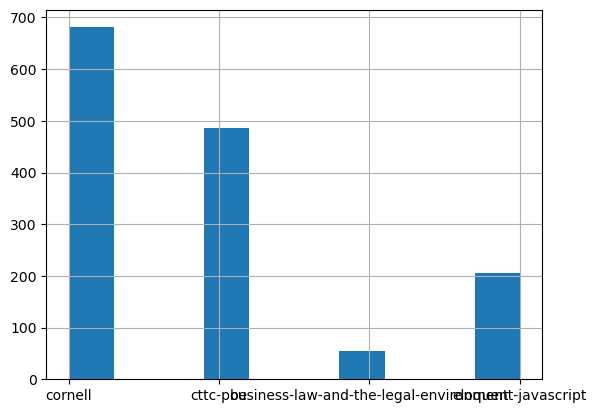

In [7]:
df_sampled["volume_slug"].hist()